### link_to_view_the_model_performance: https://www.linkedin.com/posts/hui-liu-3b705a245_machinelearning-computervision-projects-activity-7021504645306994688-hIqr?utm_source=share&utm_medium=member_desktop

### Load the data

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [4]:
Train = pd.read_csv(os.getcwd()+'/train.csv')
Test = pd.read_csv(os.getcwd()+'/test.csv')

In [5]:
print(f'train_shape:{Train.shape}\ntest_shape:{Test.shape}')

train_shape:(42000, 785)
test_shape:(28000, 784)


In [6]:
Xtrain, ytrain = np.array(Train.iloc[:, 1:]), np.array(Train.iloc[:,0])

In [7]:
Xtest = np.array(Test)

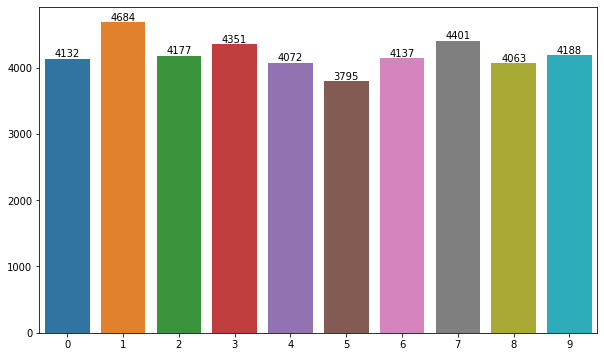

In [8]:
sns.barplot(x=np.unique(ytrain), y = np.bincount(ytrain))
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
fig=plt.gcf()
fig.set_size_inches(10,6);

### visualize the data

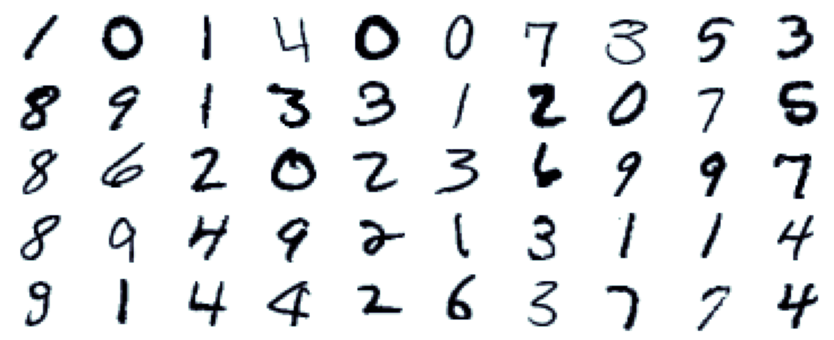

In [9]:
fig, axes = plt.subplots(5, 10, figsize=(15,6), subplot_kw = dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.05, wspace=0.05))
for i, ax in enumerate(axes.flat):
    ax.imshow(Xtrain[i].reshape(28,28), cmap='bone_r')
    for j in ax.spines.values():
        j.set_visible(False)

### build a neural network

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(5, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(10, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 5)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        460       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 10)                2

2023-01-16 17:28:40.111214: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
Xtrain = Xtrain.reshape(42000, 28,28,1)
ytrain = to_categorical(ytrain)

In [12]:
model.fit(Xtrain, ytrain, epochs=5, steps_per_epoch=256)

Epoch 1/5
256/256 [==============================] - 4s 12ms/step - loss: 6.2942 - acc: 0.6860
Epoch 2/5
256/256 [==============================] - 3s 11ms/step - loss: 0.9245 - acc: 0.8800
Epoch 3/5
256/256 [==============================] - 3s 12ms/step - loss: 0.5286 - acc: 0.9124
Epoch 4/5
256/256 [==============================] - 3s 12ms/step - loss: 0.3659 - acc: 0.9302
Epoch 5/5
256/256 [==============================] - 4s 15ms/step - loss: 0.2786 - acc: 0.9403


In [13]:
epochs = range(1, 6) 
loss = model.history.history['loss']
acc = model.history.history['acc']

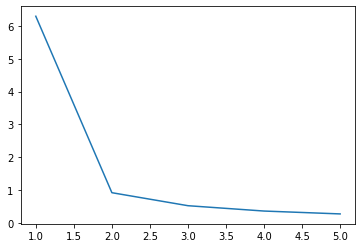

In [14]:
plt.plot(epochs, loss, label='loss');

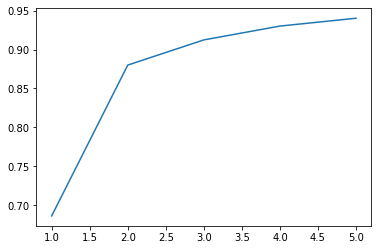

In [15]:
plt.plot(epochs, acc, label='acc');

In [16]:
pred=model.predict(Xtest.reshape(28000, 28,28,1))

875/875 [==============================] - 2s 2ms/step


In [17]:
def visualize_result(label):
    fig, axes = plt.subplots(5, 10, figsize=(15,6), subplot_kw = dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(Xtest[labels==label][i].reshape(28, 28), cmap='bone_r')
        for j in ax.spines.values():
            j.set_visible(False)

In [18]:
labels =np.array([np.argmax(i) for i in pred])

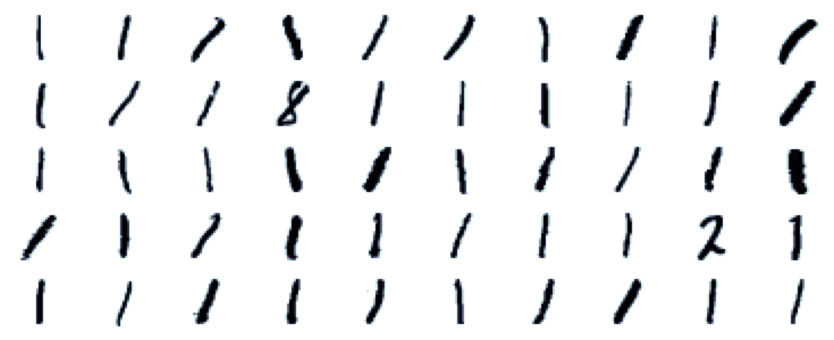

In [19]:
visualize_result(1) # mostly correct for 1`

### build a Knn model

In [20]:
clf = KNeighborsClassifier(n_neighbors=10)

In [21]:
train_data = Xtrain.reshape(42000, 28*28)
test_data = Xtest.reshape(28000, 28*28)

In [22]:
ytrain = np.array(Train.iloc[:,0])

In [23]:
labels = clf.fit(train_data, ytrain).predict(test_data)

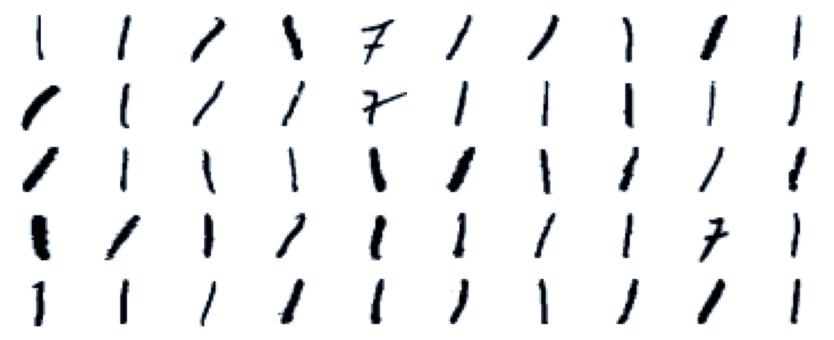

In [24]:
visualize_result(1) # the prediction is mostly correct for 1

### build a svm classifier

In [304]:
svc = SVC(kernel = 'rbf', probability=True)

In [305]:
labels = svc.fit(train_data, ytrain).predict(test_data)

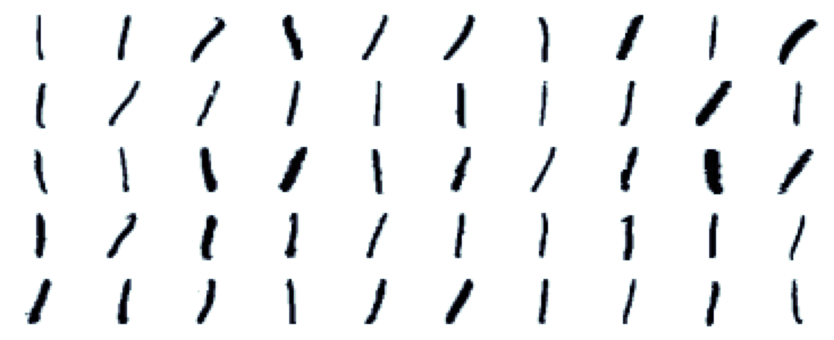

In [306]:
visualize_result(1)

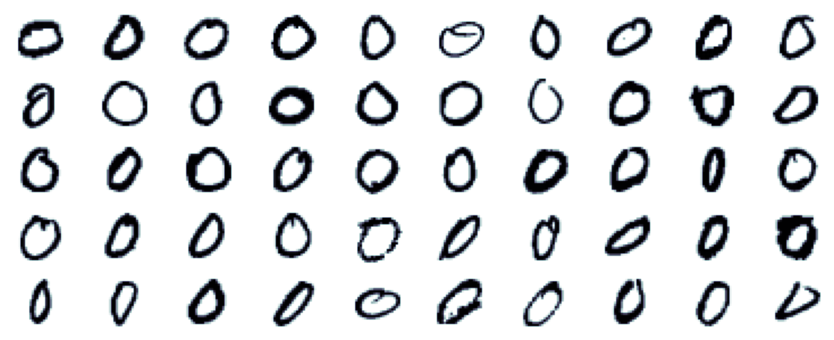

In [308]:
visualize_result(0)

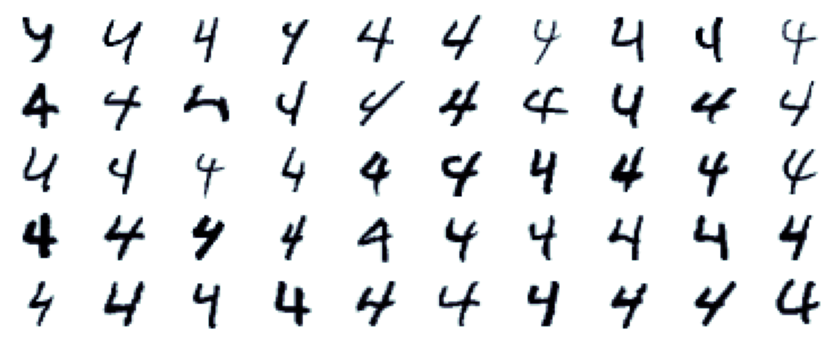

In [309]:
visualize_result(4)

### submission

In [37]:
submission = pd.DataFrame({'ImageID':pd.Series(range(28000)),'prediction':labels })

In [38]:
submission

,ImageID,prediction
0,0,2
1,1,0
2,2,9
3,3,9
4,4,3
...,...,...
27995,27995,9
27996,27996,7
27997,27997,3
27998,27998,9


### save the model 

In [ ]:
with open('svc_model', 'wb') as file:
    pickle.dump(svc, file)

### test cv2 capturing picture 

In [45]:
import cv2




----------------Contoured Image--------------------


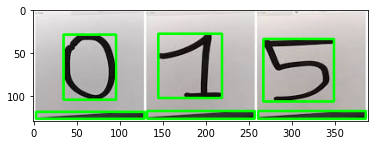

In [350]:
image = cv2.imread('images-2.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

In [351]:
Xtest[0].shape

(784,)

In [352]:
svc.predict(Xtest[0].reshape(1,784))

array([2])

In [353]:
svc.predict_proba(Xtest[0].reshape(1,28*28)).max(axis=1)

array([0.99996631])

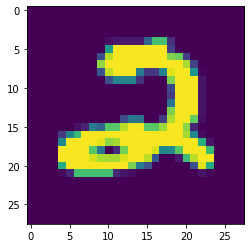

In [354]:
plt.imshow(Xtest[0].reshape(28,28))

In [355]:
np.array(preprocessed_digits).shape

(6, 28, 28)

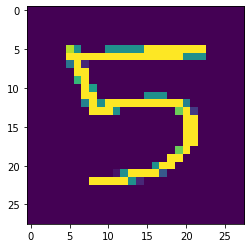

In [357]:
plt.imshow(preprocessed_digits[3].reshape(28,28))

In [358]:
svc.predict(preprocessed_digits[3].reshape(1,784))

array([5])